In [1]:
# LSTM for bearing prognostics
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import sys
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\Users\506-3\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\506-3\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\506-3\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\506-3\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
np.random.seed(42)
# convert an array of values into a dataset matrix

In [3]:
#define a function for labelling the data

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
# fix random seed for reproducibility
np.random.seed(7)

(2152, 1)


<function matplotlib.pyplot.show(*args, **kw)>

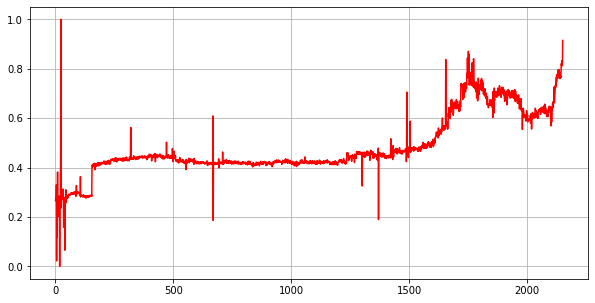

In [16]:
# load the dataset
dataframe = read_csv('RMS_B4.csv', usecols=[0], 
                     engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
print(dataset.shape)

#visialisation
pyplot.figure(figsize=(10,5))
pyplot.plot(dataset, color= 'r')
plt.grid()
pyplot.show

(2152, 1)


<function matplotlib.pyplot.show(*args, **kw)>

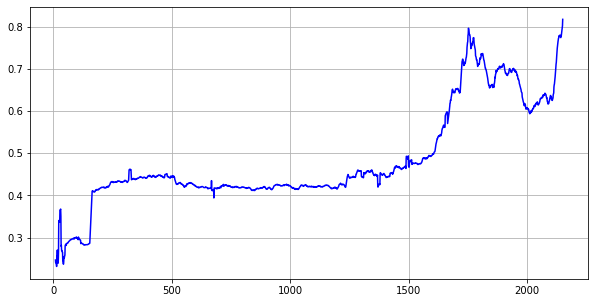

In [14]:
#moving average algorithm
dat_frame = pd.DataFrame(dataset)
dataset = dat_frame.rolling(10).mean()
print(dataset.shape)
pyplot.figure(figsize=(10,5))
pyplot.plot(dataset, color= 'b')
plt.grid()
pyplot.show

In [18]:
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print(trainX.shape)
print(testX.shape)

(1504, 1, 1)
(644, 1, 1)


Instructions for updating:
Use tf.cast instead.
Train on 1203 samples, validate on 301 samples
Epoch 1/500
 - 1s - loss: 0.1696 - val_loss: 0.1901
Epoch 2/500
 - 0s - loss: 0.1453 - val_loss: 0.1638
Epoch 3/500
 - 0s - loss: 0.1230 - val_loss: 0.1393
Epoch 4/500
 - 0s - loss: 0.1019 - val_loss: 0.1157
Epoch 5/500
 - 0s - loss: 0.0819 - val_loss: 0.0931
Epoch 6/500
 - 0s - loss: 0.0632 - val_loss: 0.0720
Epoch 7/500
 - 0s - loss: 0.0465 - val_loss: 0.0533
Epoch 8/500
 - 0s - loss: 0.0323 - val_loss: 0.0372
Epoch 9/500
 - 0s - loss: 0.0208 - val_loss: 0.0245
Epoch 10/500
 - 0s - loss: 0.0126 - val_loss: 0.0153
Epoch 11/500
 - 0s - loss: 0.0074 - val_loss: 0.0091
Epoch 12/500
 - 0s - loss: 0.0044 - val_loss: 0.0055
Epoch 13/500
 - 0s - loss: 0.0031 - val_loss: 0.0036
Epoch 14/500
 - 0s - loss: 0.0027 - val_loss: 0.0026
Epoch 15/500
 - 0s - loss: 0.0025 - val_loss: 0.0022
Epoch 16/500
 - 0s - loss: 0.0025 - val_loss: 0.0021
Epoch 17/500
 - 0s - loss: 0.0025 - val_loss: 0.0020
Epoch 18/500


Epoch 150/500
 - 0s - loss: 0.0016 - val_loss: 0.0013
Epoch 151/500
 - 0s - loss: 0.0016 - val_loss: 0.0012
Epoch 152/500
 - 0s - loss: 0.0016 - val_loss: 0.0013
Epoch 153/500
 - 0s - loss: 0.0016 - val_loss: 0.0013
Epoch 154/500
 - 0s - loss: 0.0016 - val_loss: 0.0013
Epoch 155/500
 - 0s - loss: 0.0016 - val_loss: 0.0012
Epoch 156/500
 - 0s - loss: 0.0016 - val_loss: 0.0013
Epoch 157/500
 - 0s - loss: 0.0016 - val_loss: 0.0013
Epoch 158/500
 - 0s - loss: 0.0016 - val_loss: 0.0012
Epoch 159/500
 - 0s - loss: 0.0016 - val_loss: 0.0013
Epoch 160/500
 - 0s - loss: 0.0016 - val_loss: 0.0012
Epoch 161/500
 - 0s - loss: 0.0016 - val_loss: 0.0012
Epoch 162/500
 - 0s - loss: 0.0015 - val_loss: 0.0012
Epoch 163/500
 - 0s - loss: 0.0015 - val_loss: 0.0012
Epoch 164/500
 - 0s - loss: 0.0015 - val_loss: 0.0012
Epoch 165/500
 - 0s - loss: 0.0015 - val_loss: 0.0012
Epoch 166/500
 - 0s - loss: 0.0015 - val_loss: 0.0012
Epoch 167/500
 - 0s - loss: 0.0015 - val_loss: 0.0012
Epoch 168/500
 - 0s - loss: 

 - 0s - loss: 0.0013 - val_loss: 0.0010
Epoch 302/500
 - 0s - loss: 0.0013 - val_loss: 0.0010
Epoch 303/500
 - 0s - loss: 0.0013 - val_loss: 0.0010
Epoch 304/500
 - 0s - loss: 0.0013 - val_loss: 0.0010
Epoch 305/500
 - 0s - loss: 0.0013 - val_loss: 0.0011
Epoch 306/500
 - 0s - loss: 0.0013 - val_loss: 0.0010
Epoch 307/500
 - 0s - loss: 0.0013 - val_loss: 0.0010
Epoch 308/500
 - 0s - loss: 0.0013 - val_loss: 0.0010
Epoch 309/500
 - 0s - loss: 0.0013 - val_loss: 0.0010
Epoch 310/500
 - 0s - loss: 0.0013 - val_loss: 0.0011
Epoch 311/500
 - 0s - loss: 0.0013 - val_loss: 9.9193e-04
Epoch 312/500
 - 0s - loss: 0.0013 - val_loss: 0.0011
Epoch 313/500
 - 0s - loss: 0.0013 - val_loss: 9.6716e-04
Epoch 314/500
 - 0s - loss: 0.0013 - val_loss: 0.0011
Epoch 315/500
 - 0s - loss: 0.0013 - val_loss: 0.0010
Epoch 316/500
 - 0s - loss: 0.0013 - val_loss: 0.0010
Epoch 317/500
 - 0s - loss: 0.0013 - val_loss: 0.0011
Epoch 318/500
 - 0s - loss: 0.0013 - val_loss: 0.0010
Epoch 319/500
 - 0s - loss: 0.0013

Epoch 451/500
 - 0s - loss: 0.0013 - val_loss: 0.0010
Epoch 452/500
 - 0s - loss: 0.0013 - val_loss: 0.0010
Epoch 453/500
 - 0s - loss: 0.0013 - val_loss: 0.0010
Epoch 454/500
 - 0s - loss: 0.0013 - val_loss: 0.0010
Epoch 455/500
 - 0s - loss: 0.0013 - val_loss: 0.0010
Epoch 456/500
 - 0s - loss: 0.0013 - val_loss: 9.6620e-04
Epoch 457/500
 - 0s - loss: 0.0013 - val_loss: 0.0011
Epoch 458/500
 - 0s - loss: 0.0013 - val_loss: 0.0010
Epoch 459/500
 - 0s - loss: 0.0013 - val_loss: 0.0010
Epoch 460/500
 - 0s - loss: 0.0013 - val_loss: 0.0010
Epoch 461/500
 - 0s - loss: 0.0013 - val_loss: 0.0010
Epoch 462/500
 - 0s - loss: 0.0013 - val_loss: 9.9372e-04
Epoch 463/500
 - 0s - loss: 0.0013 - val_loss: 9.9354e-04
Epoch 464/500
 - 0s - loss: 0.0013 - val_loss: 0.0010
Epoch 465/500
 - 0s - loss: 0.0013 - val_loss: 0.0010
Epoch 466/500
 - 0s - loss: 0.0013 - val_loss: 0.0010
Epoch 467/500
 - 0s - loss: 0.0013 - val_loss: 0.0010
Epoch 468/500
 - 0s - loss: 0.0013 - val_loss: 0.0010
Epoch 469/500
 -

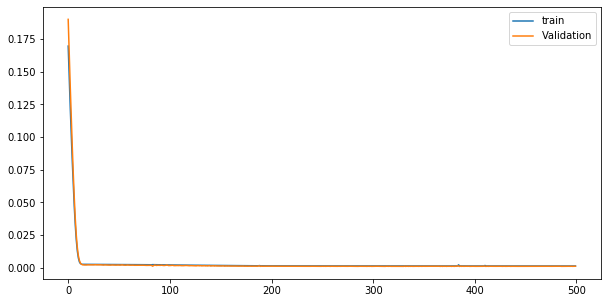

In [20]:
# create and fit the LSTM network
model = Sequential()
#model.add(LSTM(5, input_shape=(1, look_back), activation='tanh',return_sequences=True))
model.add(LSTM(5, input_shape=(1, look_back)))
model.add(Dense(3))

model.add(Dense(1,activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')

#fit the model
history = model.fit(trainX, trainY, epochs=500, batch_size=100, validation_split=0.2, verbose=2, shuffle=True)

#plot history
pyplot.figure(figsize=(10,5))
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='Validation')
pyplot.legend()
pyplot.show

print(history)

In [24]:
print(model.get_weights())

[array([[ 0.6689383 , -0.03627521,  1.0483916 ,  0.8091255 , -0.50187564,
        -0.02378976, -0.1118232 ,  0.23675948,  0.39046305,  0.43576598,
         0.5612109 ,  0.24607877, -1.1600615 , -0.345714  , -0.24435487,
        -0.08877064, -0.48091465,  0.2455202 ,  0.20740858,  0.05605033]],
      dtype=float32), array([[-0.18358617, -0.04268923,  0.00817401, -0.09729455, -0.604846  ,
         0.21804637, -0.2553095 ,  0.14231001, -0.07319929, -0.14411998,
         0.03975948, -0.13135475,  0.12100878, -0.05419803,  0.39006364,
         0.17297576,  0.18370312, -0.20002727,  0.35519382, -0.10764734],
       [ 0.06644084, -0.5205752 , -0.22069179,  0.35682663,  0.14153463,
         0.09844563, -0.01825334,  0.23703223, -0.11214373,  0.33096907,
        -0.06481592, -0.35890344, -0.17593056,  0.03144498,  0.07852431,
         0.12500778, -0.32775435, -0.18310606,  0.10639019, -0.0344    ],
       [ 0.227688  , -0.31259757, -0.2974224 ,  0.14292067, -0.23421134,
        -0.21124497,  0.

In [25]:
# make predictions (test data)
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
print(trainPredict.shape)
trainY.shape

(1504, 1)


(1504,)

In [26]:
# invert predictions back to original shape
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [27]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.01 RMSE
Test Score: 0.01 RMSE


In [29]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


In [30]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


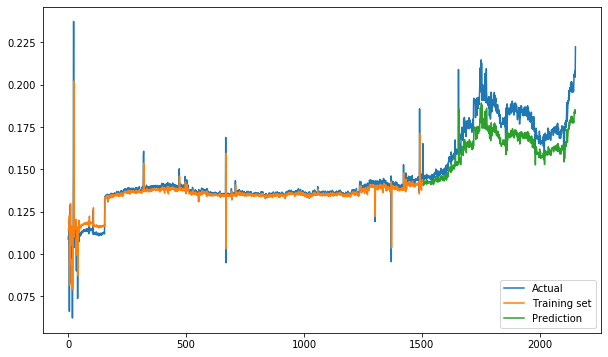

(2152, 1)


In [32]:
# plot baseline and predictions
pyplot.figure(figsize=(10,6))
plt.plot(scaler.inverse_transform(dataset),label="Actual")
plt.plot(trainPredictPlot,label="Training set")
plt.plot(testPredictPlot,label= 'Prediction')
plt.legend()
plt.show()

print(testPredictPlot.shape)

(147, 1)


C:\Users\506-3\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  app.launch_new_instance()


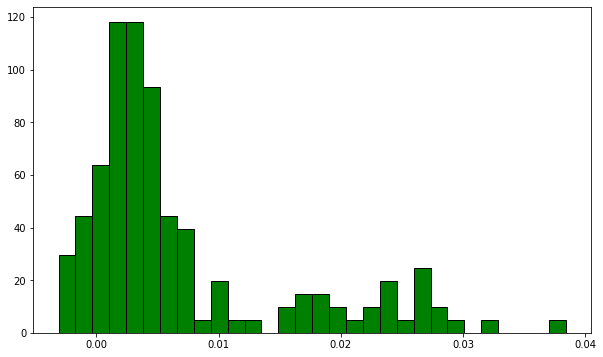

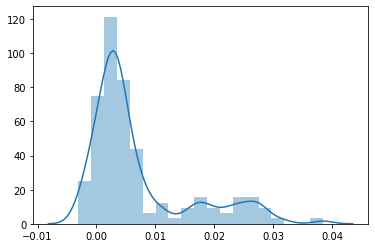

In [14]:
predicted = testPredict.transpose()
pred_error = testY - predicted
pred_error = pred_error.transpose()
print(pred_error.shape)
#print(testY.shape)
#print(predicted.shape)


#plot histogram
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

pyplot.figure(figsize=(10,6))

plt.hist(pred_error, color = 'green', edgecolor = 'black',bins = 30, normed=True)
plt.show() 
#x = np.linspace(min(pred_error), max(pred_error), 100)

#plt.plot(x, mlab.normpdf(x, mean, sigma))

 
import seaborn as sns
import numpy as np

sns.distplot(pred_error)
plt.show() 

In [13]:
print(pred_error)

[[ 0.00184419]
 [ 0.00591632]
 [-0.00071465]
 [-0.00073765]
 [ 0.00452705]
 [ 0.00211086]
 [-0.00069381]
 [ 0.00242034]
 [ 0.00982315]
 [-0.00277319]
 [ 0.00307147]
 [ 0.00281668]
 [ 0.00463081]
 [ 0.00076183]
 [ 0.00355389]
 [ 0.00175318]
 [ 0.00599303]
 [ 0.00289425]
 [-0.00156374]
 [ 0.00269675]
 [ 0.00334205]
 [ 0.00760538]
 [-0.00070065]
 [ 0.00757977]
 [ 0.00185787]
 [-0.00024525]
 [ 0.00109626]
 [ 0.00398166]
 [ 0.00441599]
 [-0.00209062]
 [ 0.00674228]
 [ 0.00510103]
 [-0.00277319]
 [ 0.00307147]
 [ 0.00281668]
 [ 0.00463081]
 [ 0.00076183]
 [ 0.00355389]
 [ 0.00175318]
 [ 0.00599303]
 [ 0.00289425]
 [-0.00156374]
 [ 0.00269675]
 [ 0.00334205]
 [ 0.00760538]
 [-0.00070065]
 [ 0.00757977]
 [ 0.00185787]
 [-0.00024525]
 [ 0.00109626]
 [ 0.00398166]
 [ 0.00441599]
 [-0.00209062]
 [ 0.00674228]
 [ 0.00415546]
 [-0.00010119]
 [ 0.00538341]
 [ 0.00428376]
 [-0.00309375]
 [ 0.00291768]
 [ 0.00583934]
 [ 0.0009884 ]
 [ 0.00237987]
 [ 0.00395955]
 [ 0.00312223]
 [ 0.00312154]
 [-0.00089